## week 3

* read ML Assignment 1 data (options A and B)  
* get to know the data

In [1]:
# imports and specifications
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ML Assignment 1, option A

`toxiccomments_train.csv` download [here](https://drive.google.com/open?id=1bX5UL2_xwPJHjt8lmtkw1IznjupTP97C) (*must be logged into newschool.edu Google account to access*)

In [2]:
f = 'final_data/toxiccomments_train.csv'
toxic_data = pd.read_csv(f)

### get to know the data

In [3]:
print("toxic_data is:", type(toxic_data))
print("toxic_data has", toxic_data.shape[0], "rows and", toxic_data.shape[1], "columns", "\n")
print("the data types for each of the columns in toxic_data:")
print(toxic_data.dtypes, "\n")
print("the first 10 rows in toxic_data:")
print(toxic_data.head(5))

toxic_data is: <class 'pandas.core.frame.DataFrame'>
toxic_data has 159571 rows and 8 columns 

the data types for each of the columns in toxic_data:
id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
dtype: object 

the first 10 rows in toxic_data:
                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1     

### Create a feature that contains the quantity of the number of words in a comment (word count)

In [4]:
toxic_data['word_count'] = toxic_data['comment_text'].str.split(' ').str.len()
print(toxic_data[["comment_text", "word_count"]].head())

                                        comment_text  word_count
0  Explanation\nWhy the edits made under my usern...          42
1  D'aww! He matches this background colour I'm s...          18
2  Hey man, I'm really not trying to edit war. It...          42
3  "\nMore\nI can't make any real suggestions on ...         112
4  You, sir, are my hero. Any chance you remember...          13


### Is there a relationship between word count and toxic?

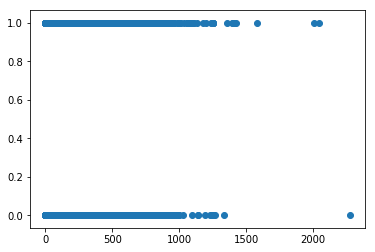

In [5]:
plt.scatter(toxic_data["word_count"], toxic_data["toxic"])

### Let's get to know the "toxic" label

In [6]:
toxic_data["toxic"].count()

159571

In [7]:
toxic_data["toxic"].mean()

0.09584448302009764

### Create a subset of non-toxic comments

In [8]:
non_toxic = toxic_data.loc[toxic_data["toxic"]==0]
print(non_toxic.shape)

(144277, 9)


Let's look at some non-toxic comments: 

In [9]:
this_sample = non_toxic['comment_text'].sample(n=5, random_state=10)
for sample in this_sample: 
    print(sample, '\n')
    print('* * * * * * *')

Hello there, 

 Is there any specific reason why you targeted and gutted all the articles I had helpfully contributed to?  There didn't seem to be  a legitimate reason to remove any of the accurate and useful information I added to individual articles off the Ring of Honor employee page. While I am sure you had your reasons I respectfully request you refresh your memory by going to Wikipedia's articles pertaining to Good Faith Edits and remaining civil. Thank you very much and have a great day! 

* * * * * * *
That makes three experienced admins that you take issue with upon the proper application of WP policy. Since you are not Galileo and we are not the Spanish Inquisition then you may wish to deliberate upon the concept that you might be wrong (or the concept of admitting the possibility that there may be times when you could be wrong, if the former is too much of a leap for you). 

* * * * * * *
Barrett on Corporal Clegg 

Some source I've read in the late 15 years and over (since 

### What is the datatype of `toxic_data`?

In [10]:
print(type(toxic_data))
print(type(toxic_data.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### What are the datatypes of the features in `toxic_data`?

In [11]:
print(toxic_data.dtypes)

id               object
comment_text     object
toxic             int64
severe_toxic      int64
obscene           int64
threat            int64
insult            int64
identity_hate     int64
word_count        int64
dtype: object


_ _ _

# ML Assignment 1, option B

`moviereviews_train.csv` download [here](https://drive.google.com/open?id=1bX5UL2_xwPJHjt8lmtkw1IznjupTP97C) (*must be logged into newschool.edu Google account to access*)

In [12]:
f2 = 'final_data/moviereviews_train.tsv'
movie_data = pd.read_csv(f2, sep='\t')

### get to know the data

In [13]:
print("movie_data is:", type(movie_data))
print("movie_data has", movie_data.shape[0], "rows and", movie_data.shape[1], "columns", "\n")
print("the data types for each of the columns in movie_data:")
print(movie_data.dtypes, "\n")
print("the first 10 rows in movie_data:")
print(movie_data.head(5))

movie_data is: <class 'pandas.core.frame.DataFrame'>
movie_data has 25000 rows and 3 columns 

the data types for each of the columns in movie_data:
id           object
sentiment     int64
review       object
dtype: object 

the first 10 rows in movie_data:
       id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...


### Create a feature that contains the quantity of the number of words in a comment (word count)

In [14]:
movie_data['word_count'] = movie_data['review'].str.split(' ').str.len()
print(movie_data[["review", "word_count"]].head())

                                              review  word_count
0  With all this stuff going down at the moment w...         433
1  \The Classic War of the Worlds\" by Timothy Hi...         158
2  The film starts with a manager (Nicholas Bell)...         378
3  It must be assumed that those who praised this...         379
4  Superbly trashy and wondrously unpretentious 8...         367


### Is there a relationship between word count and good/bad review? 

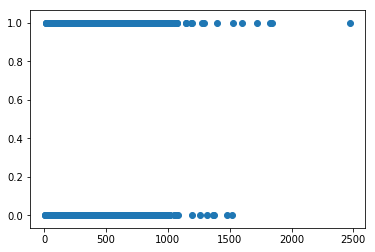

In [15]:
plt.scatter(movie_data["word_count"], movie_data["sentiment"])

### Let's get to know the "sentiment" label (1=good review, 0=bad review)

In [16]:
movie_data["sentiment"].count()

25000

In [17]:
movie_data["sentiment"].mean()

0.5

### Create a subset of "bad" reviews

In [18]:
bad_reviews = movie_data.loc[movie_data["sentiment"]==0]
print(bad_reviews.shape)

(12500, 4)


Let's look at some bad reviews: 

In [19]:
this_sample2 = bad_reviews['review'].sample(n=5, random_state=555)
for sample in this_sample2: 
    print(sample, '\n')
    print('* * * * * * *')

I have to admit that i liked the first half of Sleepers. It looked good, the acting was even better, the story of childhood, pain and revenge was interesting and moving. A superior hollywood film. But...No one mentioned this so far (at least in the latest 20 comments), when it came to the courtroom scenes and Brat Pitt´s character followed his plan to rescue his two friends, who are rightly accused of murder, i felt cheated. This movie insulted my intelligence. <br /><br />Warning spoilers!!<br /><br />Why did anyone accept their false alibi, witnessed by the priest? If these two guys had been with him, why shouldn´t they tell this during the investigation? Amnesia? If you were the judge or member of the jury, would you believe it? Is it wise to give the motif of the murderers away?<br /><br />I am sorry, but in the end, the story is very weak, and this angers me. This movie had great potential. 4/10 

* * * * * * *
If there was ever a call to make a bad film that reflected how stupid 

### What is the datatype of `movie_data`?


In [20]:
print(type(movie_data))
print(type(movie_data.values))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### What are the datatypes of the features in `movie_data`?

In [21]:
print(movie_data.dtypes)

id            object
sentiment      int64
review        object
word_count     int64
dtype: object
